## Project Title: Applying Gemini in workplace scenarios to enhance productivity.

# Introduction:

> In today’s rapidly changing business landscape, companies are increasingly exploring how artificial intelligence can make their work faster, smarter, and more creative. One of the most accessible tools driving this change is Gemini—a conversational AI that can assist with everything from writing and data analysis to idea generation and workflow automation.
In this project, I will take on the role of an employee at a small business that’s launching an internal AI adoption initiative. My manager has asked me to test Gemini across a few departments and demonstrate how it can be used to improve everyday operations.

**Objectives:**

*   Analyze a dataset using conversational prompt engineering.

*   Apply Gemini for content generation, visual descriptions, and reports.

*   Produce a short, professional report summarizing your workflow, insights, and reflections.









### **Data Dictionary:**

The employee_performance.xlsx file is a fictional dataset representing a company’s employee performance over the past quarter.

It contains several columns, including:

*   `Employee Name` : The full name of the employee.

*   `Department` : The functional unit the employee belongs to (e.g., Finance, Marketing, IT, Sales, HR, Operations).

*   `Projects Completed` : The total number of projects the employee successfully completed within the evaluation period.

*   `Average Rating (1–10)` : A performance rating averaged across evaluations, on a scale from 1 (lowest) to 10 (highest).

*   `Total Sales ($)` : The total revenue generated by the employee.

*   `Engagement Score` : A composite metric representing employee engagement.


# Load Dataset

Load the `employee_performance.xlsx` file from google drive into a pandas DataFrame named `df_employee_performance`.


In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a variable file_path to store the dataset path
file_path = '/content/drive/MyDrive/datascience_365 Projects/employee_performance.xlsx'

# Load dataset into a pandas DataFrame named df_employee_performance
df_employee_performance = pd.read_excel(file_path)
print("DataFrame 'df_employee_performance' loaded successfully.")

DataFrame 'df_employee_performance' loaded successfully.


# Exploratory Data Analysis (EDA) Using Gemini.

### **Prompts**:
"I've uploaded a dataset called employee_performance.xlsx. Please confirm that you can read it and briefly describe what's inside."

"Proceed to expkore the data (EDA) and summarize key insights from the EDA for example:
- Total numbers of rows and columns in the dataset
- Numerical amd categorical features and their data types
- Number of missing values and outliers
- Summary statistics"

## Initial Data Inspection

Display the first few rows of the dataset, check data types, and get a summary of descriptive statistics to understand the basic structure and content.


In [ ]:
print("First 5 rows of the DataFrame:")
print(df_employee_performance.head())

print("\nDataFrame Info (data types and non-null values):")
df_employee_performance.info()

print("\nDescriptive Statistics for numerical columns:")
print(df_employee_performance.describe())

First 5 rows of the DataFrame:
    Employee Name  Department  Projects Completed  Average Rating (1–10)  \
0    Peyton Brown  Operations                  27                    7.4   
1   Peyton Garcia   Marketing                   7                    9.4   
2   Peyton Miller       Sales                  28                    9.5   
3    Morgan Davis   Marketing                  26                    6.3   
4  Kendall Miller          IT                  33                    6.1   

   Total Sales ($)  Engagement Score  
0            39911             145.0  
1            16023             114.1  
2            37479             157.2  
3            25150             110.8  
4            16174             114.7  

DataFrame Info (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee Name  

## Handle Missing Values

I will check for missing values in the `df_employee_performance` DataFrame by using the `.isnull().sum()` method to get a count of missing values per column.


In [ ]:
print("Missing values per column:")
print(df_employee_performance.isnull().sum())

Missing values per column:
Employee Name            0
Department               0
Projects Completed       0
Average Rating (1–10)    0
Total Sales ($)          0
Engagement Score         0
dtype: int64


## Visualize Data Distributions and Outliers

Visualize the distributions of key numerical variables using histograms and identify potential outliers using box plots for 'Projects Completed', 'Average Rating (1–10)', 'Total Sales ($)', and 'Engagement Score'.


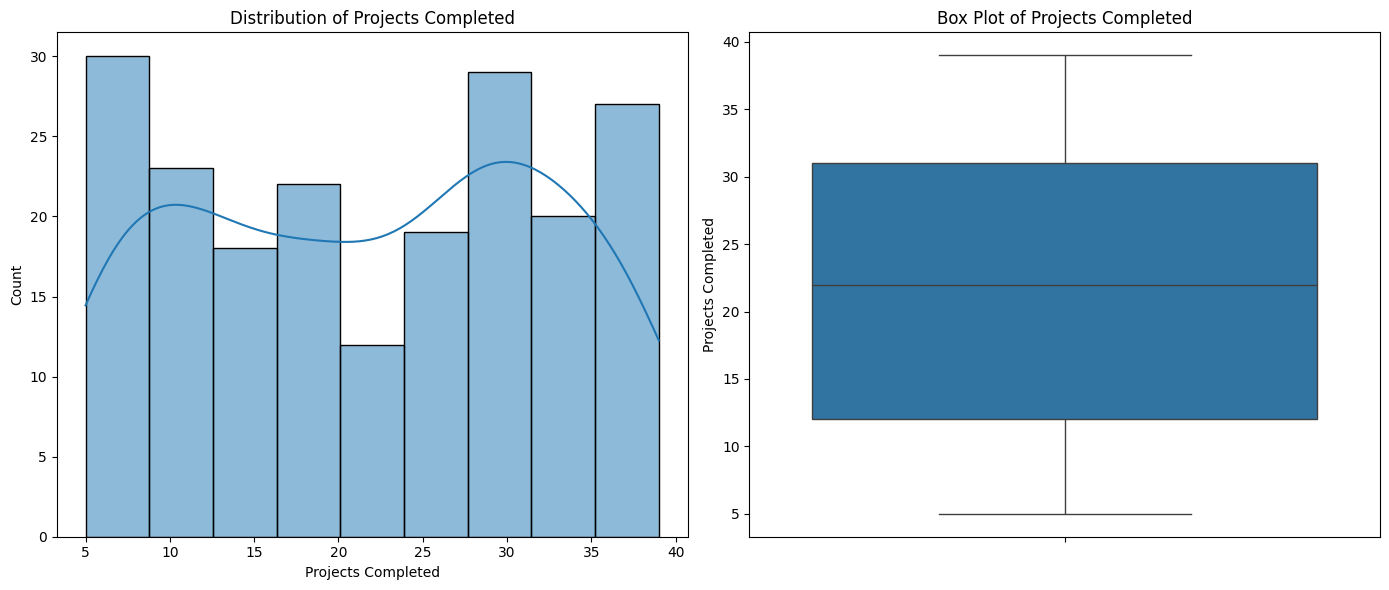

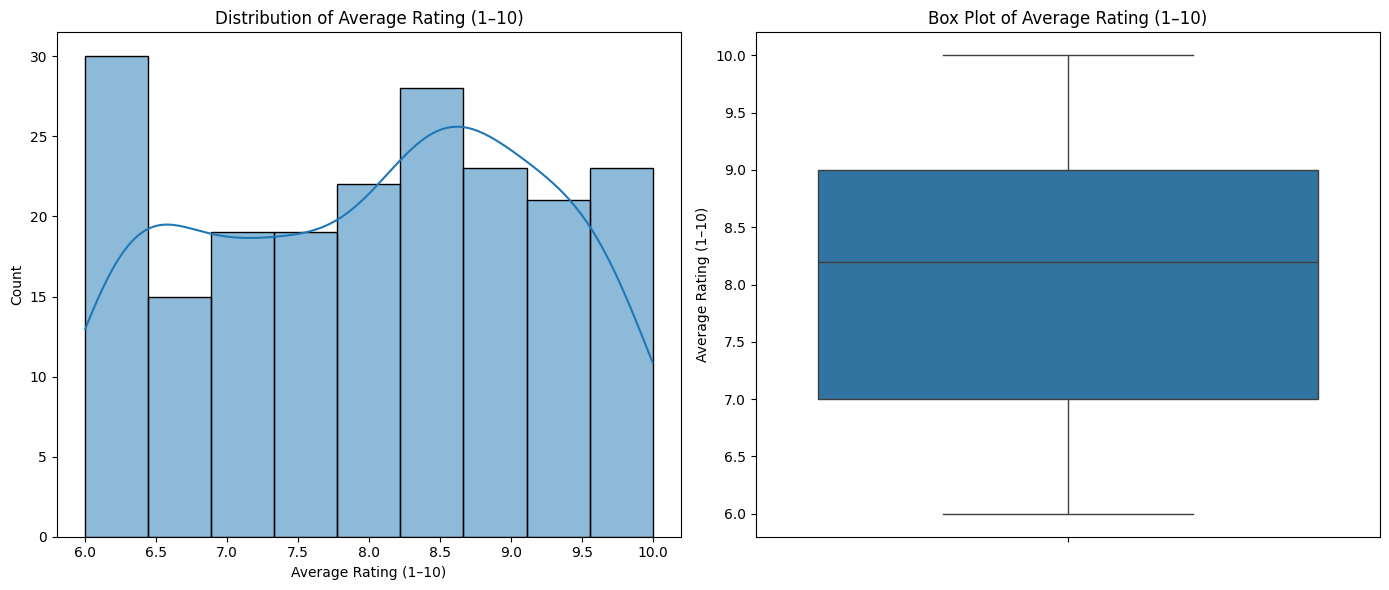

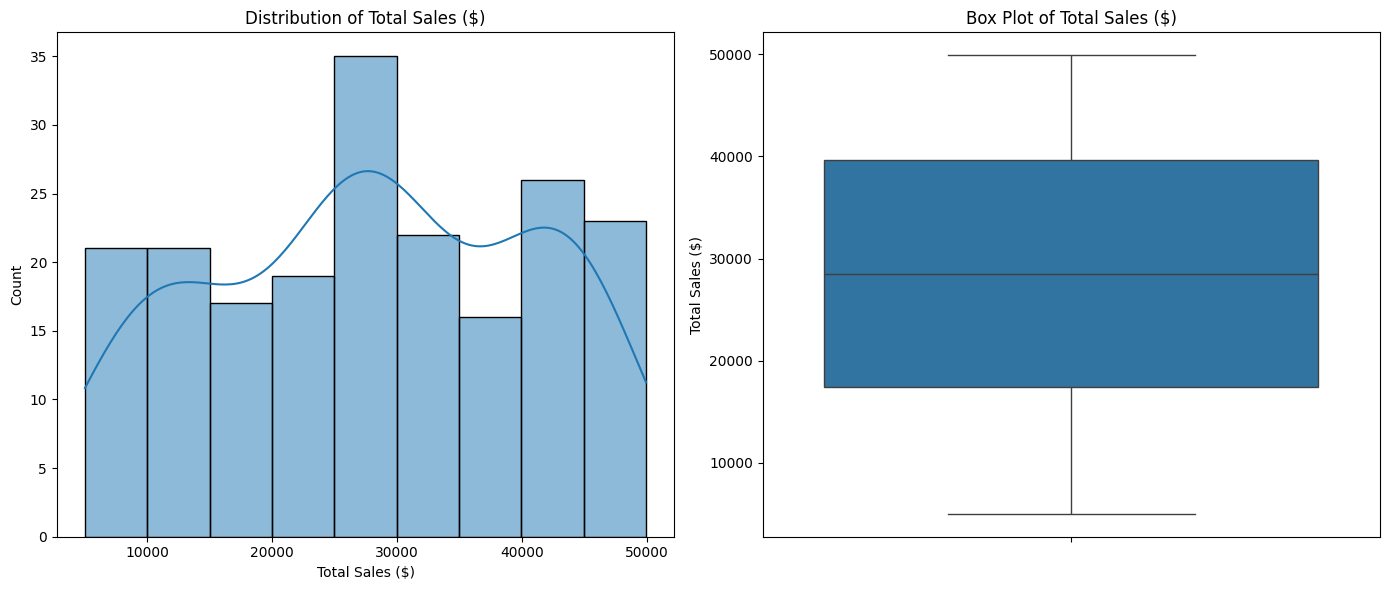

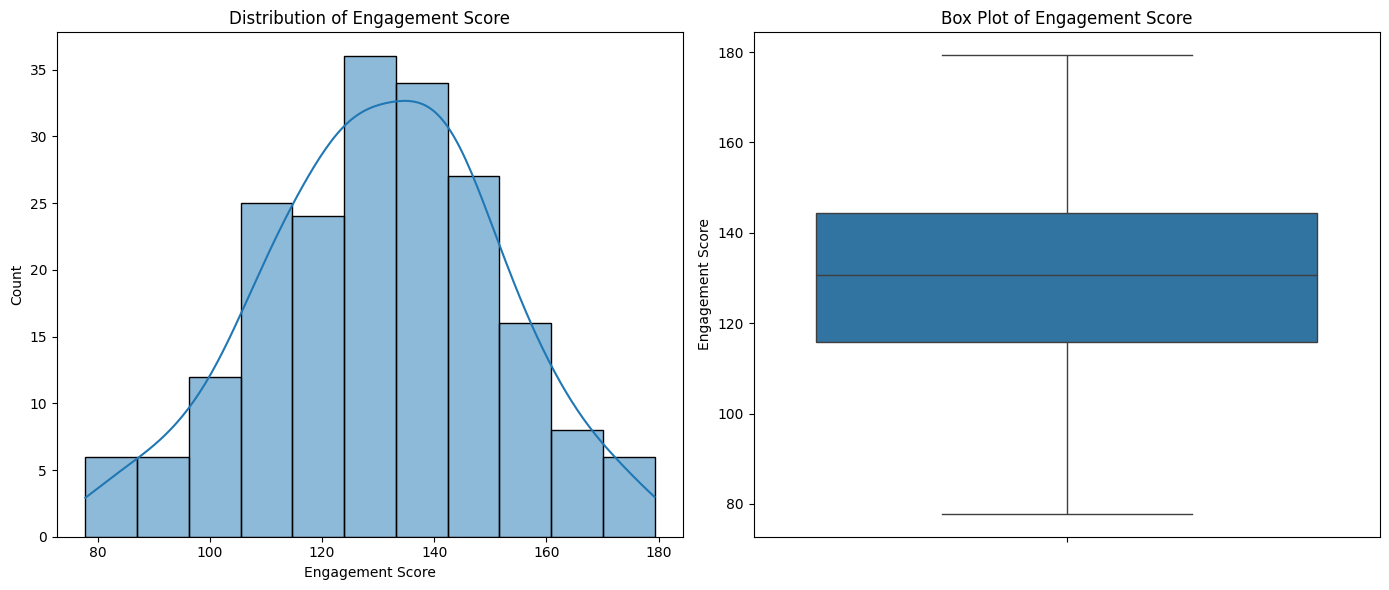

In [ ]:
# Select numerical columns
numerical_cols = ['Projects Completed', 'Average Rating (1–10)', 'Total Sales ($)', 'Engagement Score']

# Iterate over numerical columns and create histograms and box plots
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(df_employee_performance[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    sns.boxplot(y=df_employee_performance[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

### Summary of EDA Insights:

The initial data exploration of the `employee_performance.xlsx` dataset revealed the following key insights:

*   **Dataset Dimensions**: The DataFrame `df_employee_performance` contains **200 rows** and **6 columns**.
*   **Data Types**: The dataset consists of a mix of data types:
    *   `object`: 'Employee Name', 'Department'

    *   `int64`: 'Projects Completed', 'Total Sales ($)'
    
    *   `float64`: 'Average Rating (1–10)', 'Engagement Score'
    
    All data types are appropriate for their respective columns.

*   **Missing Values**: A thorough check confirmed that there are **no missing values** across any of the columns in the dataset, ensuring data completeness.

*   **Outliers**: There are no observed outliers or distribution patterns.

**Descriptive Statistics (key highlights)**

The descriptive statistics for numerical columns indicate the following:

**Projects Completed**: Employees completed an average of 21.87 projects, with the number ranging from 5 to 39 projects.

**Average Rating (1–10)**: The average performance rating was 8.02, with individual ratings spanning from 6.0 to a perfect 10.0.

**Total Sales ($)**: Employees generated an average of 28,029.91 in sales, with figures varying widely from 5,009 to 49,912.

**Engagement Score**: The average engagement score was 130.34, with scores recorded between 77.8 and 179.3.



# Analyze the Employee Performance Dataset Using Gemini.

### **Prompts**:
"For the data analysis aspect, I'm interested in identifying the top 5 performing employees: List the five employees with the highest Engagement Scores by including their names, departments, and engagement values"

"Next, calculate the total sales amount generated by these five employees."

## Identify Top 5 Employees by Engagement Score

Identify and list the five employees with the highest 'Engagement Score', including their names, departments, and engagement values by sorting the DataFrame by this column in descending order and then select and display the 'Employee Name', 'Department', and 'Engagement Score' for the first five rows.


In [ ]:
top_engagement = df_employee_performance.sort_values(by='Engagement Score', ascending=False).head(5)
print("Top 5 Employees by Engagement Score:")
print(top_engagement[['Employee Name', 'Department', 'Engagement Score']])

Top 5 Employees by Engagement Score:
     Employee Name  Department  Engagement Score
168   Reese Thomas          HR             179.3
31   Alex Anderson     Finance             174.8
56   Peyton Thomas  Operations             174.0
122     Alex Moore          IT             173.7
34     Riley Brown     Finance             172.7


## Calculate Total Sales for Top 5 Engaged Employees

To calculate the total sales for the top 5 engaged employees, I will access the 'Total Sales ($)' column from the `top_engagement` DataFrame and then sum its values.


In [ ]:
total_sales_top_engagement = top_engagement['Total Sales ($)'].sum()
print(f"Total sales generated by the top 5 engaged employees: ${total_sales_top_engagement:.2f}")

Total sales generated by the top 5 engaged employees: $231359.00


## Summary:

### Data Analysis Key Findings

*   The `df_employee_performance` dataset contains 200 rows and 6 columns with appropriate data types and no missing values.
*   **Projects Completed**: This variable shows a relatively spread-out distribution with no significant outliers.
*   **Average Rating (1–10)**: The distribution is skewed towards higher ratings (between 8 and 10), with no clear outliers.
*   **Total Sales (\$):** The distribution is fairly uniform, suggesting a wide range of sales performance without extreme outliers.
*   **Engagement Score**: This variable exhibits an approximately normal distribution, centered around 130, with no significant outliers.
*   The top 5 employees based on 'Engagement Score' are:
    *   Reese Thomas (HR) with an Engagement Score of 179.3
    *   Alex Anderson (Finance) with an Engagement Score of 174.8
    *   Peyton Thomas (Operations) with an Engagement Score of 174.0
    *   Alex Moore (IT) with an Engagement Score of 173.7
    *   Riley Brown (Finance) with an Engagement Score of 172.7
*   These top 5 engaged employees collectively contributed \$231,359.00 to the total sales.

### Insights or Next Steps

*   The high collective sales contribution (\$231,359.00) from the top 5 most engaged employees suggests a strong correlation between engagement and sales performance, highlighting the value of employee engagement initiatives.
*   Further analysis could explore the specific characteristics or practices of these highly engaged and top-performing employees to identify best practices that can be replicated across the organization.


# Write an Internal Memo Using Gemini.

### **Prompts**:
"Write a 200-word internal memo titled "Recognizing Our Most Engaged Team Members". Summarize the analysis results from the our employee_performance.xlsx dataset, highlight the top five employees, and use a positive, motivational tone."

"Make a tone slightly more conversational but still professional."

## Recognizing Our Most Engaged Team Members
To: All Employees

From: Management

Date: [Current Date]

Subject: Celebrating Outstanding Engagement and Performance

We're excited to share some insights from our recent look at the `employee_performance.xlsx` dataset. This dive into the data really highlighted the incredible dedication and hard work across our teams, and it's clear that your engagement plays a vital role in our collective success.

Our analysis showed a strong connection between high engagement and great performance across key metrics like projects completed, average ratings, and total sales. It's truly inspiring to see how your passion translates into tangible results.

We want to take a moment to specifically recognize our top five most engaged employees, whose commitment is truly exemplary:

**Reese Thomas (HR)**,
**Alex Anderson (Finance)**,
**Peyton Thomas (Operations)**,
**Alex Moore (IT)**,
**Riley Brown (Finance)**.
These five individuals collectively contributed an impressive **$231,359.00 to our total sales**! This really underscores the immense value of an engaged workforce. Their dedication not only drives productivity but also helps foster such a positive and thriving work environment for all of us. Let's celebrate their amazing achievements and draw inspiration from their commitment as we continue to grow and succeed together!

# Prepare a Professional Announcement Email Using Gemini.

### **Prompts**:
"Write a professional and engaging email to all company employess announcing the release of our internal memo titled 'Recognizing Our Most Engaged Team Members'. The email should:
- Introduce the memo in a positive and inclusive tone
- Congratulate the top team members featured in the test
- Be concise and suitable for an internal company announcement."

"Make the tone of the Email a bit warmer and more celebratory."

"Add a short closing line inviting everyone to congratulate the featured employees."

## Email: Announcing 'Recognizing Our Most Engaged Team Members' Memo

Subject: Celebrating Team Excellence: Introducing Our Employee Engagement Memo!

Dear Team,

We're excited to share some truly uplifting news with you all! We've just released an internal memo titled 'Recognizing Our Most Engaged Team Members', which highlights the incredible dedication and outstanding contributions within our company.

This memo dives into insights from our recent analysis of the `employee_performance.xlsx` dataset, showcasing how engagement plays a vital role in our collective success. We are particularly thrilled to congratulate the top five team members who are specifically featured for their exemplary commitment.

Their passion and hard work not only drive productivity but also foster a positive and thriving work environment for everyone. We encourage you to read the full memo to learn more about our collective achievements and draw inspiration from these shining examples.

P.S. Let's all take a moment to congratulate our amazing featured employees for their outstanding contributions!

Thank you for everything you do to make our company a great place to work!

Best regards,

[Your Name/Management Team]

# Create Your AI Adoption Summary Report Using Gemini.

### **Prompts:**
"Please create a professional report titled 'AI Adoption Summary Report'
The report should:
- Summarize each task I completed (data analysis, text creation and email).
- Explain how Gemini was used in each step.
- Highlight the main benefits of using Gemini for everyday business workflows.
- End with recommendations for how the company could continue using Gemini effectively."

"Make the introduction more concise and executive-friendly."

"Add a short conclusion about the overall impact of using Gemini."

## AI Adoption Summary Report

### Introduction
This report provides an executive summary of our initial AI adoption initiative, showcasing how Gemini (an advanced conversational AI) was leveraged to enhance productivity across various workplace scenarios, from data analysis to communication.

### Summary of Completed Tasks and Gemini's Role

1.  **Data Analysis (Employee Performance Dataset)**
    *   **Task Completed**: Conducted Exploratory Data Analysis (EDA) on the `employee_performance.xlsx` dataset, including data loading, initial inspection (rows, columns, data types, missing values, descriptive statistics), visualization of numerical distributions and outliers, identification of the top 5 most engaged employees, and calculation of their collective sales contribution.
    *   **Gemini's Contribution**: Gemini orchestrated the entire data analysis workflow. It generated Python code using libraries like Pandas, Matplotlib, and Seaborn to load, inspect, visualize, and derive insights from the dataset. Gemini then summarized these findings, transforming raw data into actionable insights, such as identifying the most engaged employees and their sales impact.

2.  **Text Creation (Internal Memo)**
    *   **Task Completed**: Drafted an internal memo titled 'Recognizing Our Most Engaged Team Members' to celebrate high-performing employees and communicate analysis findings.
    *   **Gemini's Contribution**: Gemini generated the initial draft of the memo, incorporating specific requirements for content (highlighting top 5 employees, collective sales) and tone (positive, motivational). It iteratively refined the memo's language and tone, making it more conversational and professional based on feedback.

3.  **Email Creation (Announcement)**
    *   **Task Completed**: Composed a professional email to all employees, announcing the release of the internal memo.
    *   **Gemini's Contribution**: Gemini drafted the announcement email, ensuring it was concise, engaging, and suitable for internal company communication. It refined the subject line and overall tone to be warmer and more celebratory, incorporating a call to action for employees to congratulate their colleagues.

### Main Benefits of Using Gemini for Business Workflows

*   **Efficiency**: Rapid generation of code for data analysis and drafting of communication materials significantly reduced manual effort and time.
*   **Enhanced Data Insights**: Gemini's ability to process and interpret data quickly allowed for timely extraction of key performance indicators and identification of top talent.
*   **Improved Communication**: Facilitated the creation of clear, well-structured, and appropriately toned internal communications, saving time for content generation and refinement.
*   **Iterative Refinement**: Enabled quick adjustments and improvements to text based on specific feedback, ensuring outputs met precise requirements.
*   **Task Orchestration**: Streamlined complex workflows by breaking down tasks, generating necessary code or text, and guiding through the analytical process.

### Recommendations for Continued Effective Use of Gemini

1.  **Expand Data Analysis**: Utilize Gemini for more complex analytical tasks, including predictive modeling, trend analysis, and automated reporting.
2.  **Automate Communication**: Continue leveraging Gemini for drafting a wide range of internal and external communications, adapting to various audiences and objectives.
3.  **Content Generation for Training**: Employ Gemini to create training materials, summaries of reports, and FAQs, improving knowledge dissemination.
4.  **Idea Generation**: Use Gemini as a brainstorming partner for marketing campaigns, problem-solving, and strategic planning.

### Conclusion
Gemini has proven to be an invaluable tool in accelerating our data analysis, content creation, and communication processes. Its integration has demonstrated a clear pathway to increased efficiency, deeper insights, and more engaging internal communications, ultimately contributing to a more informed and motivated workforce.